### Importing the Python Libraries and Packages

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Reading the CSV file of the dataset

In [3]:
df=pd.read_csv("Mushroom_Project.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Examining the Data

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

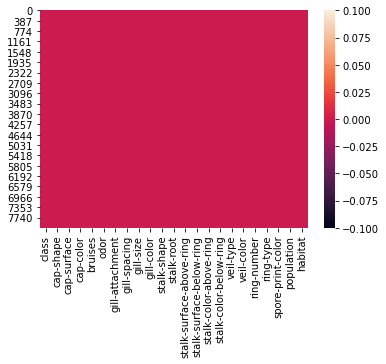

In [7]:
sns.heatmap(df.isnull())

### Descriptiove Statistics

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
#The Shape of the Dataset
df.shape

(8124, 23)

In [10]:
#Unique Occurrences of class column
df['class'].unique()

array(['p', 'e'], dtype=object)

In [11]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

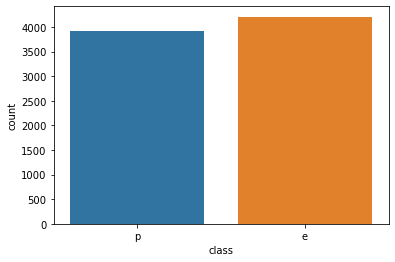

In [12]:
sns.countplot(df['class'])

#### From the Bar Plot,We see that the Dataset is Balance

### Data Manipulation

In [13]:
df=df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for column in df.columns:
    df[column]=lm.fit_transform(df[column])

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [17]:
# The Column "veil-type"is 0 and not contributing to the data so well remove it.
df=df.drop(['veil-type'],axis=1)

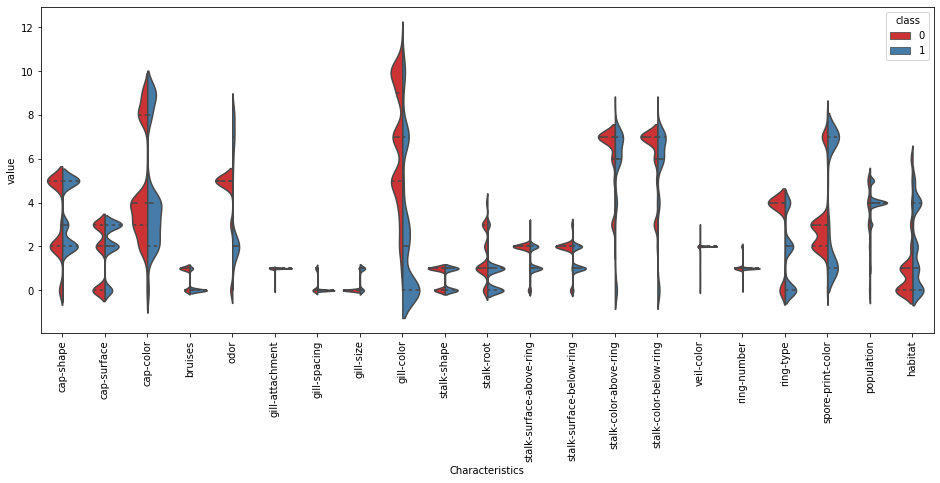

In [18]:
df_div=pd.melt(df,"class",var_name='Characteristics')
fig, ax=plt.subplots(figsize=(16,6))

p=sns.violinplot(ax=ax,x="Characteristics",y="value",hue="class",split=True,data=df_div,inner='quartile',palette='Set1')

df_no_class=df.drop(["class"],axis=1)

p.set_xticklabels(rotation=90,labels=list(df_no_class.columns));

### The correlation between the variables

In [19]:
dfcor=df.corr()
dfcor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

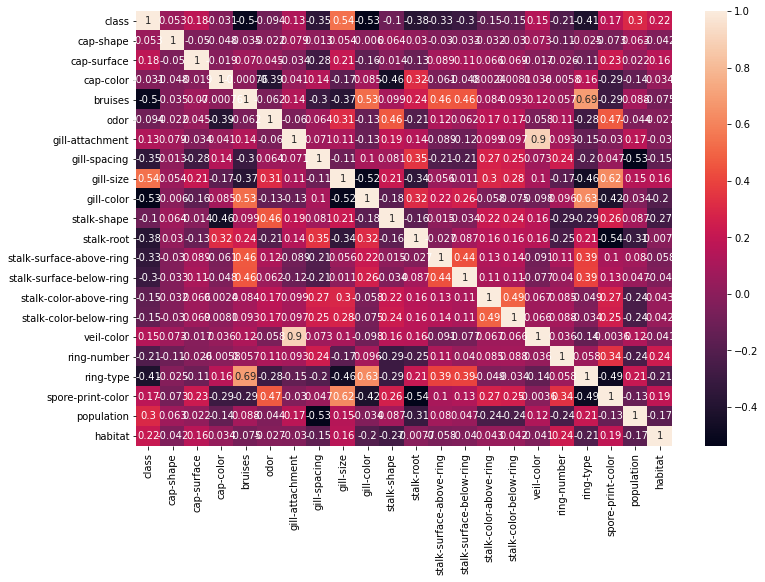

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,annot=True)

#### least Correlating variable is the most important one for classification.In this case -0.53.

### Preparing the Data

In [21]:
df.sample(1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3945,0,2,3,3,1,5,1,0,0,9,...,2,2,7,3,2,1,4,3,4,0


In [22]:
x=df.iloc[:,1:22]
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [23]:
y=df.loc[:,'class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [25]:
x_train.shape

(6336, 21)

In [26]:
x_test.shape

(1788, 21)

In [27]:
y_train.shape

(6336,)

In [28]:
y_test.shape

(1788,)

### Classification Methods

In [29]:
# MultinomialNB 
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7997762863534675
[[857  59]
 [299 573]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       916
           1       0.91      0.66      0.76       872

    accuracy                           0.80      1788
   macro avg       0.82      0.80      0.79      1788
weighted avg       0.82      0.80      0.80      1788



In [30]:
# Support Vector classifier
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9871364653243848
[[915   1]
 [ 22 850]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       916
           1       1.00      0.97      0.99       872

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



In [31]:
# Decision Tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[916   0]
 [  0 872]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       916
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [32]:
# KNeighbors classifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9994407158836689
[[915   1]
 [  0 872]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       916
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [33]:
# Support vector Machine Kernal=ker,rbf,poly
def SVMkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [34]:
SVMkernel('rbf')

0.9871364653243848
[[915   1]
 [ 22 850]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       916
           1       1.00      0.97      0.99       872

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



In [35]:
SVMkernel('poly')

0.9966442953020134
[[916   0]
 [  6 866]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       916
           1       1.00      0.99      1.00       872

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [36]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]

In [37]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy score of  DecisionTreeClassifier() is :
1.0
[[916   0]
 [  0 872]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       916
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788

Accuracy score of  SVC() is :
0.9871364653243848
[[915   1]
 [ 22 850]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       916
           1       1.00      0.97      0.99       872

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788

Accuracy score of  KNeighborsClassifier() is :
0.9994407158836689
[[915   1]
 [  0 872]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       916


In [38]:
preds=dtc.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0]
[1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0]


In [39]:
import pickle

In [40]:
filename='pickledtcfile.pkl'